                                                BHARAT INTERN 
TASK1:Develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.

Dataset link:https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/download?datasetVersionNumber=1
Dataset details:
The SMS Spam Collection is a curated compilation of 5,574 English-language SMS messages, systematically categorized as either "ham" (legitimate) or "spam." The dataset amalgamates messages from diverse origins, including the Grumbletext website, NUS SMS Corpus, Caroline Tag's PhD Thesis, and SMS Spam Corpus v.0.1 Big, making it a comprehensive resource for SMS spam research.

In [2]:
#pandas - used to perform data manipulation and analysis
#numpy - used to perform a wide variety of mathematical operations on arrays
import pandas as pd
import numpy as np

In [11]:
#lets name dataset as ds
ds = pd.read_csv('spam.csv', encoding='latin-1')
ds = ds.rename(columns={'v1': 'label', 'v2': 'message'})
print(ds)

     label                                            message Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [18]:
# Data Preprocessing
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
#removing unwanted columns
ds = ds.dropna(axis=1)
ds.head()


label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [15]:
# checing for null values
ds.isnull().sum()

label      0
message    0
dtype: int64

In [25]:
#checking duplicates:
ds.duplicated().sum()

403

In [26]:
#removing duplicates
ds= ds.drop_duplicates(keep='first')
ds.duplicated().sum()

0

In [28]:
# Using apply and lambda function to create 'label_encoded' column
ds['label_encoded'] = ds['label'].apply(lambda x: 0 if x == 'ham' else 1)

# Now ds contains the 'label_encoded' column
ds.head()

C:\Users\Marali\AppData\Local\Temp\ipykernel_38484\1028607314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['label_encoded'] = ds['label'].apply(lambda x: 0 if x == 'ham' else 1)


label                                            message  label_encoded
0   ham  Go until jurong point, crazy.. Available only ...              0
1   ham                      Ok lar... Joking wif u oni...              0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...              1
3   ham  U dun say so early hor... U c already then say...              0
4   ham  Nah I don't think he goes to usf, he lives aro...              0

data visualisation

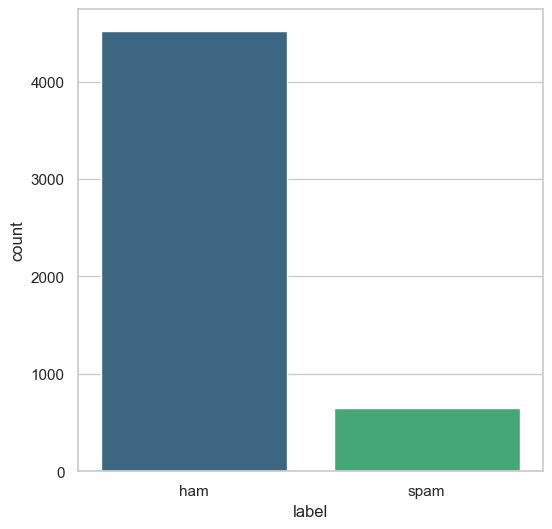

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Plot a bar 
plt.figure(figsize=(6, 6))
sns.countplot(x='label', data=ds, palette='viridis')

# Display the plot
plt.show()

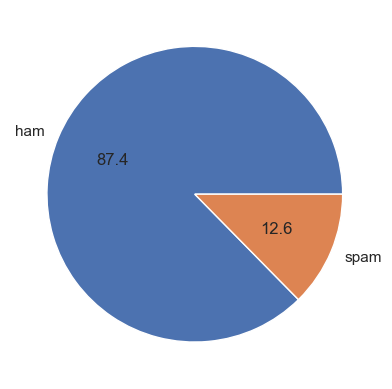

In [33]:
#pie chart
plt.pie(ds.label.value_counts(), labels=['ham', 'spam'], autopct="%0.1f")
plt.show()

In [31]:
ds['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [32]:
#we can see that 653 msg are spam i.e 12.6% 


In [34]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [44]:
#exploring data analysis(EDA)
ds = ds.copy()
ds['char_length']=ds['message'].apply(len)

In [45]:
ds['num_words']=ds['message'].apply(lambda x:len(nltk.word_tokenize(x)))
ds.head()

label                                            message  label_encoded  \
0   ham  Go until jurong point, crazy.. Available only ...              0   
1   ham                      Ok lar... Joking wif u oni...              0   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...              1   
3   ham  U dun say so early hor... U c already then say...              0   
4   ham  Nah I don't think he goes to usf, he lives aro...              0   

   num_words  char_length  sentence_length  
0         24          111                2  
1          8           29                2  
2         37          155                2  
3         13           49                1  
4         15           61                1

In [46]:
ds['sentence_length']=ds['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
ds.head()

label                                            message  label_encoded  \
0   ham  Go until jurong point, crazy.. Available only ...              0   
1   ham                      Ok lar... Joking wif u oni...              0   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...              1   
3   ham  U dun say so early hor... U c already then say...              0   
4   ham  Nah I don't think he goes to usf, he lives aro...              0   

   num_words  char_length  sentence_length  
0         24          111                2  
1          8           29                2  
2         37          155                2  
3         13           49                1  
4         15           61                1

In [73]:
ds[['num_words','char_length','sentence_length']].describe()

num_words  char_length  sentence_length
count  5169.000000  5169.000000      5169.000000
mean     18.455794    78.977945         1.965564
std      13.324758    58.236293         1.448541
min       1.000000     2.000000         1.000000
25%       9.000000    36.000000         1.000000
50%      15.000000    60.000000         1.000000
75%      26.000000   117.000000         2.000000
max     220.000000   910.000000        38.000000

In [76]:
ds[ds['label_encoded']==0][['num_words','char_length','sentence_length']].describe()

num_words  char_length  sentence_length
count  4516.000000  4516.000000      4516.000000
mean     17.123782    70.459256         1.820195
std      13.493970    56.358207         1.383657
min       1.000000     2.000000         1.000000
25%       8.000000    34.000000         1.000000
50%      13.000000    52.000000         1.000000
75%      22.000000    90.000000         2.000000
max     220.000000   910.000000        38.000000

In [77]:
ds[ds['label_encoded']==1][['num_words','char_length','sentence_length']].describe()

num_words  char_length  sentence_length
count  653.000000   653.000000       653.000000
mean    27.667688   137.891271         2.970904
std      7.008418    30.137753         1.488425
min      2.000000    13.000000         1.000000
25%     25.000000   132.000000         2.000000
50%     29.000000   149.000000         3.000000
75%     32.000000   157.000000         4.000000
max     46.000000   224.000000         9.000000

Text(0.5, 1.0, 'Distribution of spam and ham messages charaters')

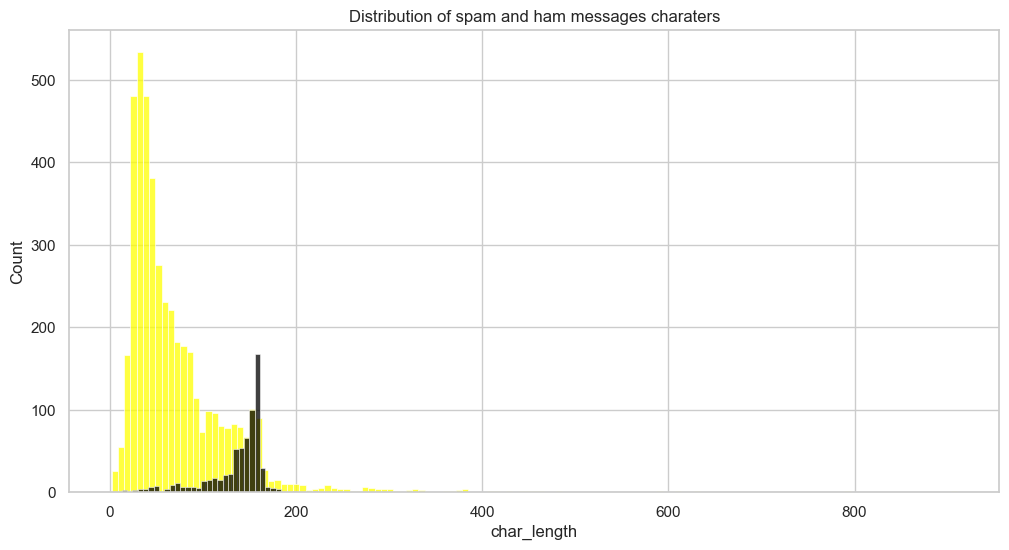

In [88]:
plt.figure(figsize=(12,6)) 
sns.histplot(ds[ds['label_encoded']==0]['char_length'],color='yellow') 
sns.histplot(ds[ds['label_encoded']==1]['char_length'],color='black')
plt.title('Distribution of spam and ham messages charaters')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


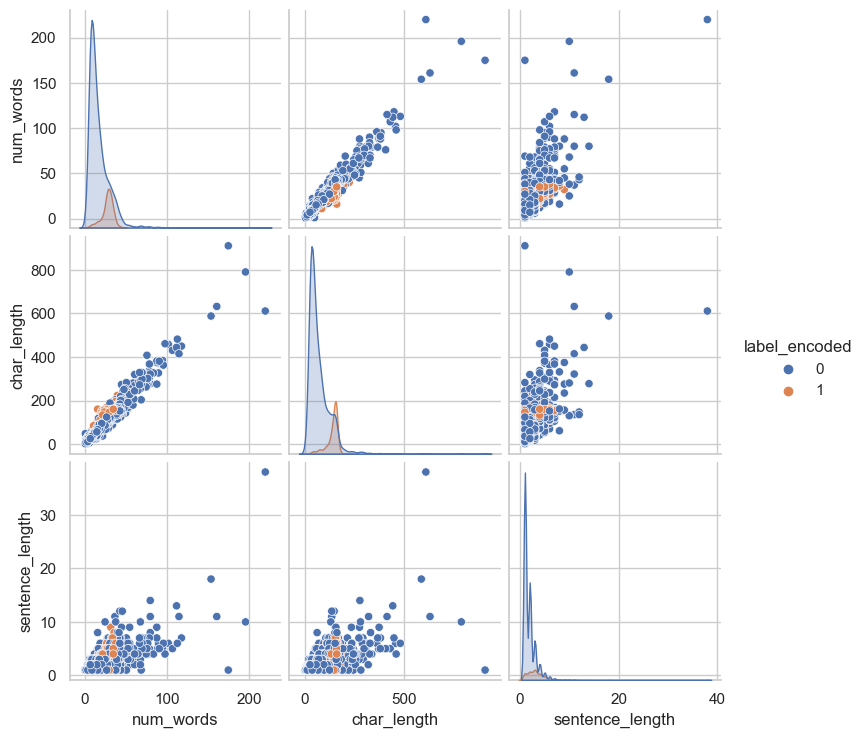

In [91]:
sns.pairplot(ds,hue='label_encoded')
plt.show()

<Axes: >

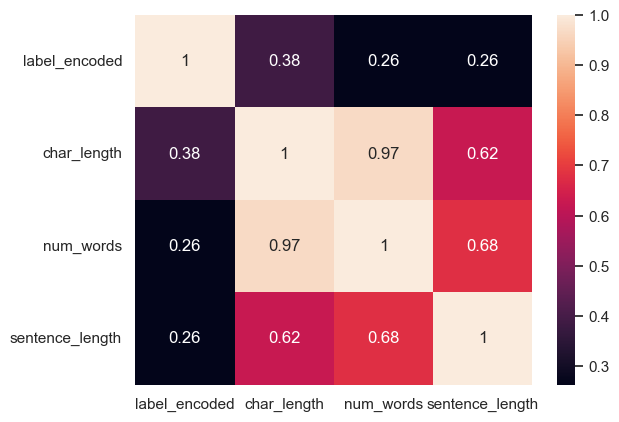

In [92]:
#using heatmap for further understanding
sns.heatmap(ds[['label_encoded','char_length', 'num_words','sentence_length']].corr(),annot=True)

description:
The correlation analysis reveals a positive correlation coefficient of 0.38 between the number of characters in a message and the likelihood of it being classified as spam. This suggests that as the message length increases, there is a tendency for it to be categorized as spam. This correlation may be attributed to specific characteristics or patterns associated with longer messages in the context of spam classification.
DECISION - The decision to incorporate the "num_characters" column in model creation is based on its correlation coefficient of 0.38 with the target variable. This coefficient indicates a relatively stronger association compared to "num_words" and "num_sentences," emphasizing the significance of message length in predicting spam classification.

In [106]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder


In [99]:
# Text Vectorization
x = np.array(ds['message'])
y = np.array(ds['label_encoded'])
cv = CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)


In [ ]:
#we use Precision help to make sure that SMS classifier is accurate in catching spam while avoiding mistakes that could upset users or miss to meet goals.

In [101]:
# Model Training
clf = GaussianNB()
if not isinstance(x_train, np.ndarray):
    x_train = x_train.toarray()

clf.fit(x_train, y_train)


GaussianNB()

In [102]:
# Model Evaluation
x_test_dense = x_test.toarray()
accuracy = clf.score(x_test_dense, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.90715667311412


In [108]:
# Model Training with Multinomial Naive Bayes
clf = MultinomialNB()
if not isinstance(x_train, np.ndarray):
    x_train = x_train.toarray()

clf.fit(x_train, y_train)

MultinomialNB()

In [109]:
# Model Evaluation
x_test_dense = x_test.toarray()
accuracy = clf.score(x_test_dense, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9729206963249516


In [111]:
# Prediction
sample = input("Enter a message: ")
data = cv.transform([sample]).toarray()
prediction = clf.predict(data)
print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")

Enter a message: Free entry in 2 a wkly comp to win FA Cup final
Prediction: Spam


In [112]:
# Prediction2
sample = input("Enter a message: ")
data = cv.transform([sample]).toarray()
prediction = clf.predict(data)
print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")

Enter a message: Nah I don't think he goes to usf, he lives aroundd...	
Prediction: Ham
